In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('../dataset/temperature-1.csv')
data.head()

,Unnamed: 0,Datetime,Hourly_Temp
0,0,04-01-2022 00:00,20.867
1,1,04-01-2022 01:00,21.000
2,2,04-01-2022 02:00,20.867
3,3,04-01-2022 03:00,20.650
4,4,04-01-2022 04:00,20.400


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7056 non-null   int64  
 1   Datetime     7056 non-null   object 
 2   Hourly_Temp  7056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.5+ KB


In [5]:
# Convert the 'Datetime' column to a datetime object
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')

# Set the 'Datetime' column as the DataFrame index
data.set_index('Datetime', inplace=True)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2022-01-04 00:00:00 to 2022-10-24 23:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7056 non-null   int64  
 1   Hourly_Temp  7056 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 165.4 KB


In [8]:
data.head()

,Unnamed: 0,Hourly_Temp
Datetime,,
2022-01-04 00:00:00,0,20.867
2022-01-04 01:00:00,1,21.000
2022-01-04 02:00:00,2,20.867
2022-01-04 03:00:00,3,20.650
2022-01-04 04:00:00,4,20.400


In [9]:
data.isnull().sum()

Unnamed: 0     0
Hourly_Temp    0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [14]:
data = data.drop('Datetime', axis=1)

KeyError: "['Datetime'] not found in axis"

In [15]:


# Check if the number of rows is even
if len(data) % 2 != 0:
    raise ValueError("The number of rows in the dataset should be even for this operation.")

# Initialize a list to store the new rows
new_rows = []

# Iterate over the DataFrame two rows at a time
for i in range(0, len(data), 2):
    # Add two consecutive rows
    row_sum = data.iloc[i] + data.iloc[i + 1]
    
    # Append the result to the list
    new_rows.append(row_sum)

# Convert the list back into a DataFrame
new_df = pd.DataFrame(new_rows)

# Optionally save the new DataFrame to a CSV file
# new_df.to_csv('new_file.csv', index=False)

# Display the new DataFrame (with 3500 rows)
print(new_df)


      Unnamed: 0  Hourly_Temp
0            1.0       41.867
1            5.0       41.517
2            9.0       40.500
3           13.0       39.300
4           17.0       38.900
...          ...          ...
3523     14093.0       51.669
3524     14097.0       53.233
3525     14101.0       51.727
3526     14105.0       49.783
3527     14109.0       47.369

[3528 rows x 2 columns]


In [16]:
new_df.head()

,Unnamed: 0,Hourly_Temp
0,1.0,41.867
1,5.0,41.517
2,9.0,40.500
3,13.0,39.300
4,17.0,38.900


In [17]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3528 non-null   float64
 1   Hourly_Temp  3528 non-null   float64
dtypes: float64(2)
memory usage: 55.2 KB


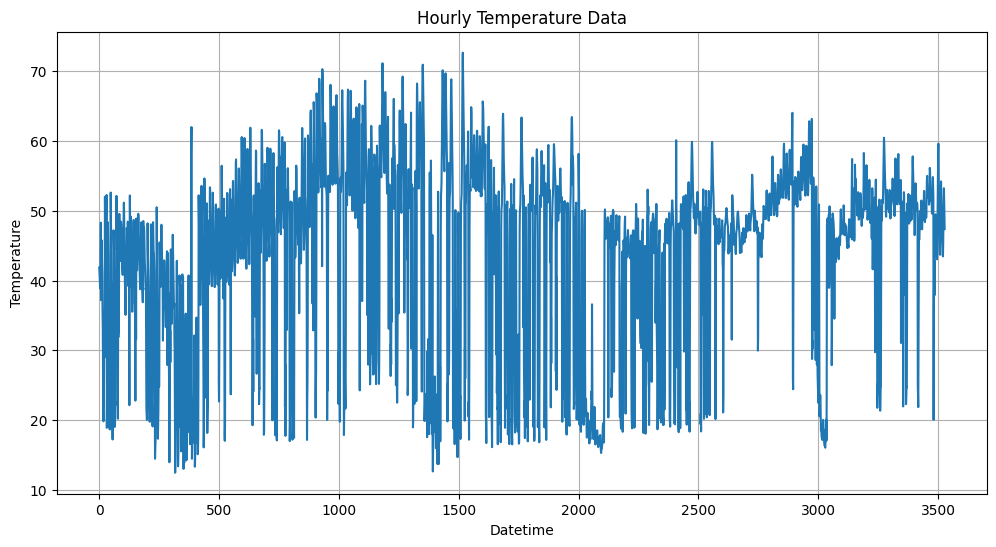

In [24]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(new_df['Hourly_Temp'])
plt.title('Hourly Temperature Data')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()


In [25]:
# Define a function to check stationarity and perform differencing
def test_stationarity(timeseries):
    # Dickey-Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value

    return dfoutput

# Check stationarity
result = test_stationarity(new_df['Hourly_Temp'])
print("Augmented Dickey-Fuller Test:")
print(result)

Augmented Dickey-Fuller Test:
Test Statistic                -6.362128e+00
p-value                        2.459734e-08
#Lags Used                     2.700000e+01
Number of Observations Used    3.500000e+03
Critical Value (1%)           -3.432220e+00
Critical Value (5%)           -2.862366e+00
Critical Value (10%)          -2.567210e+00
dtype: float64


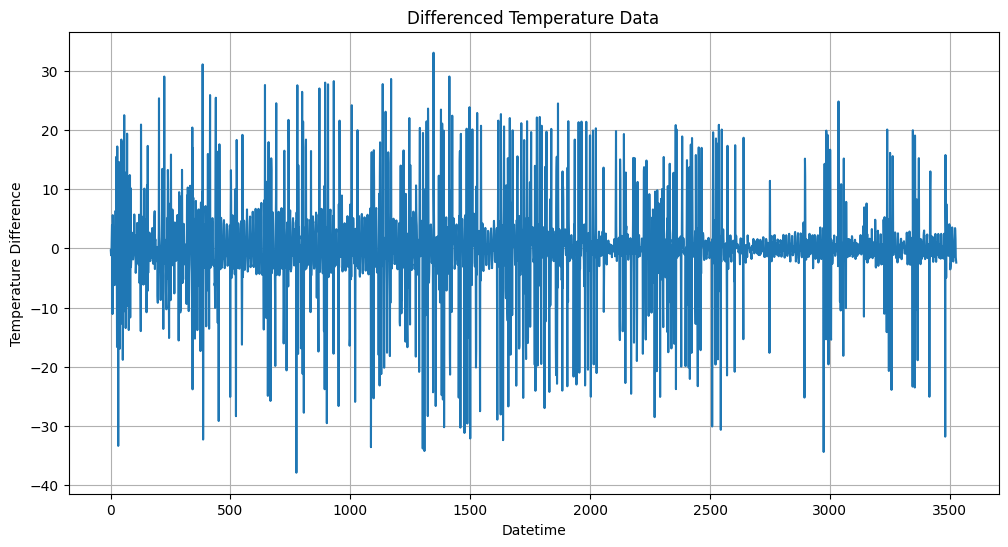

In [26]:
# Differencing to make the series stationary
new_df['Temp_Diff'] = new_df['Hourly_Temp'] - new_df['Hourly_Temp'].shift(1)
new_df.dropna(inplace=True)

# Plot differenced new_df
plt.figure(figsize=(12, 6))
plt.plot(new_df['Temp_Diff'])
plt.title('Differenced Temperature Data')
plt.xlabel('Datetime')
plt.ylabel('Temperature Difference')
plt.grid(True)
plt.show()

In [27]:
# Check stationarity of differenced data
result = test_stationarity(new_df['Temp_Diff'])
print("Augmented Dickey-Fuller Test on Differenced Data:")
print(result)

Augmented Dickey-Fuller Test on Differenced Data:
Test Statistic                -1.668170e+01
p-value                        1.514459e-29
#Lags Used                     2.700000e+01
Number of Observations Used    3.499000e+03
Critical Value (1%)           -3.432220e+00
Critical Value (5%)           -2.862366e+00
Critical Value (10%)          -2.567210e+00
dtype: float64


In [28]:
# Fit SARIMA model
model = SARIMAX(new_df['Hourly_Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=True)

In [29]:
forecast_steps = 24  # Adjust this as needed
forecast = results.get_forecast(steps=forecast_steps)

In [31]:
# Create a date range for forecasting
date_range = pd.date_range(start=new_df.index[-1], periods=forecast_steps + 1, freq='H')

In [32]:
# Get forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [33]:
# Create a forecast DataFrame
forecast_df = pd.DataFrame({'Forecast': forecast_values, 'Lower_CI': forecast_conf_int.iloc[:, 0], 'Upper_CI': forecast_conf_int.iloc[:, 1]}, index=date_range[1:])

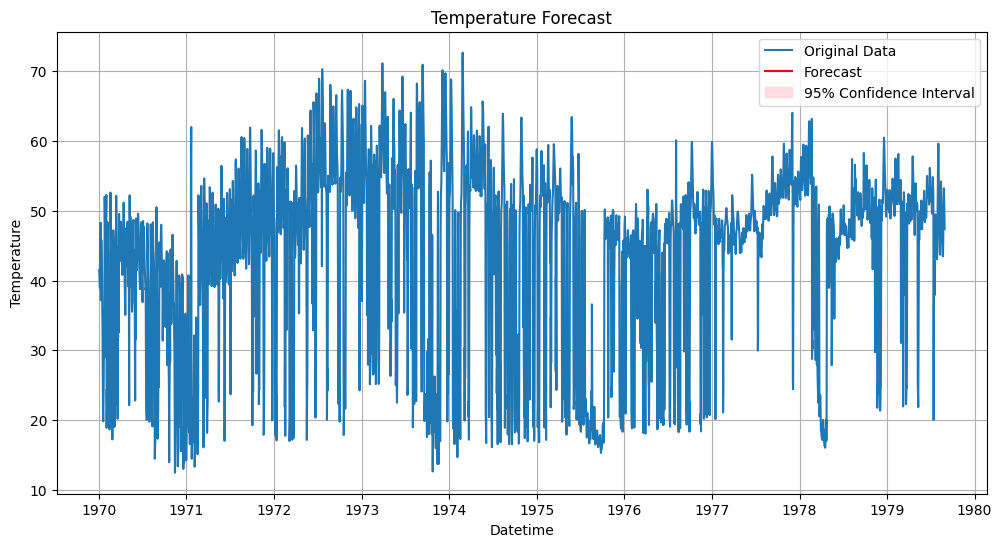

In [34]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(new_df['Hourly_Temp'], label='Original Data')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.5, label='95% Confidence Interval')
plt.title('Temperature Forecast')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
temp_data = new_df['Hourly_Temp']
temp_data

1       41.517
2       40.500
3       39.300
4       38.900
5       40.683
         ...  
3523    51.669
3524    53.233
3525    51.727
3526    49.783
3527    47.369
Name: Hourly_Temp, Length: 3527, dtype: float64

In [37]:
train_size = int(len(temp_data) * 0.8)
train, test = temp_data[:train_size], temp_data[train_size:]

In [38]:
p, d, q = 1, 1, 1
model_arima = ARIMA(train, order=(p, d, q))
results_arima = model_arima.fit()

In [39]:
forecast_arima = results_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

In [46]:
p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12
model_sarima = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, 12))
results_sarima = model_sarima.fit()

In [47]:
forecast_sarima = results_sarima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

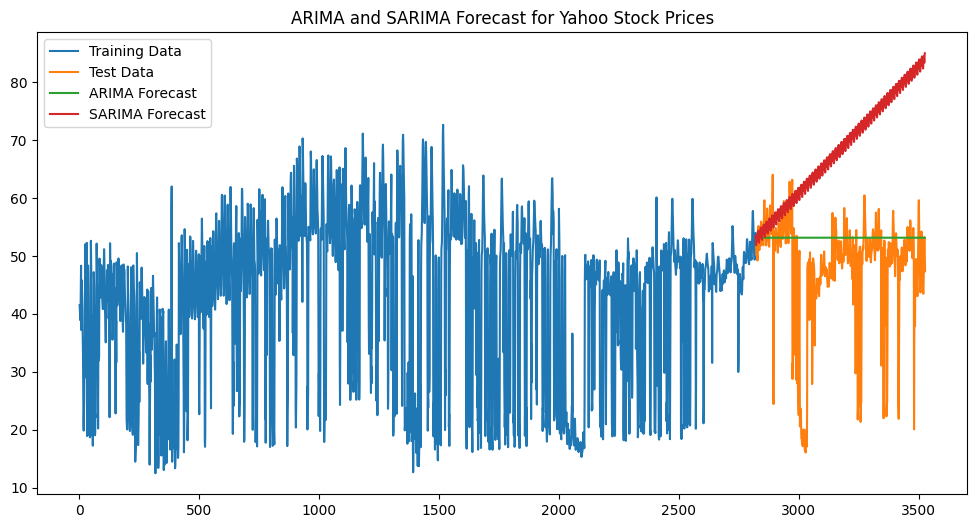

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.title('ARIMA and SARIMA Forecast for Yahoo Stock Prices')
plt.legend()
plt.show()